# 1. Dataset Preparation & Analysis

## 1.2

In [42]:
#1.2 Load dataset
import gzip
import json

dataset_file = "goemotions.json.gz"
dataset = []
#With the unzipped file, we can now load the json file into the dataset list
with gzip.open(dataset_file,'r') as unzipped:
    dataset = json.load(unzipped)

## 1.3

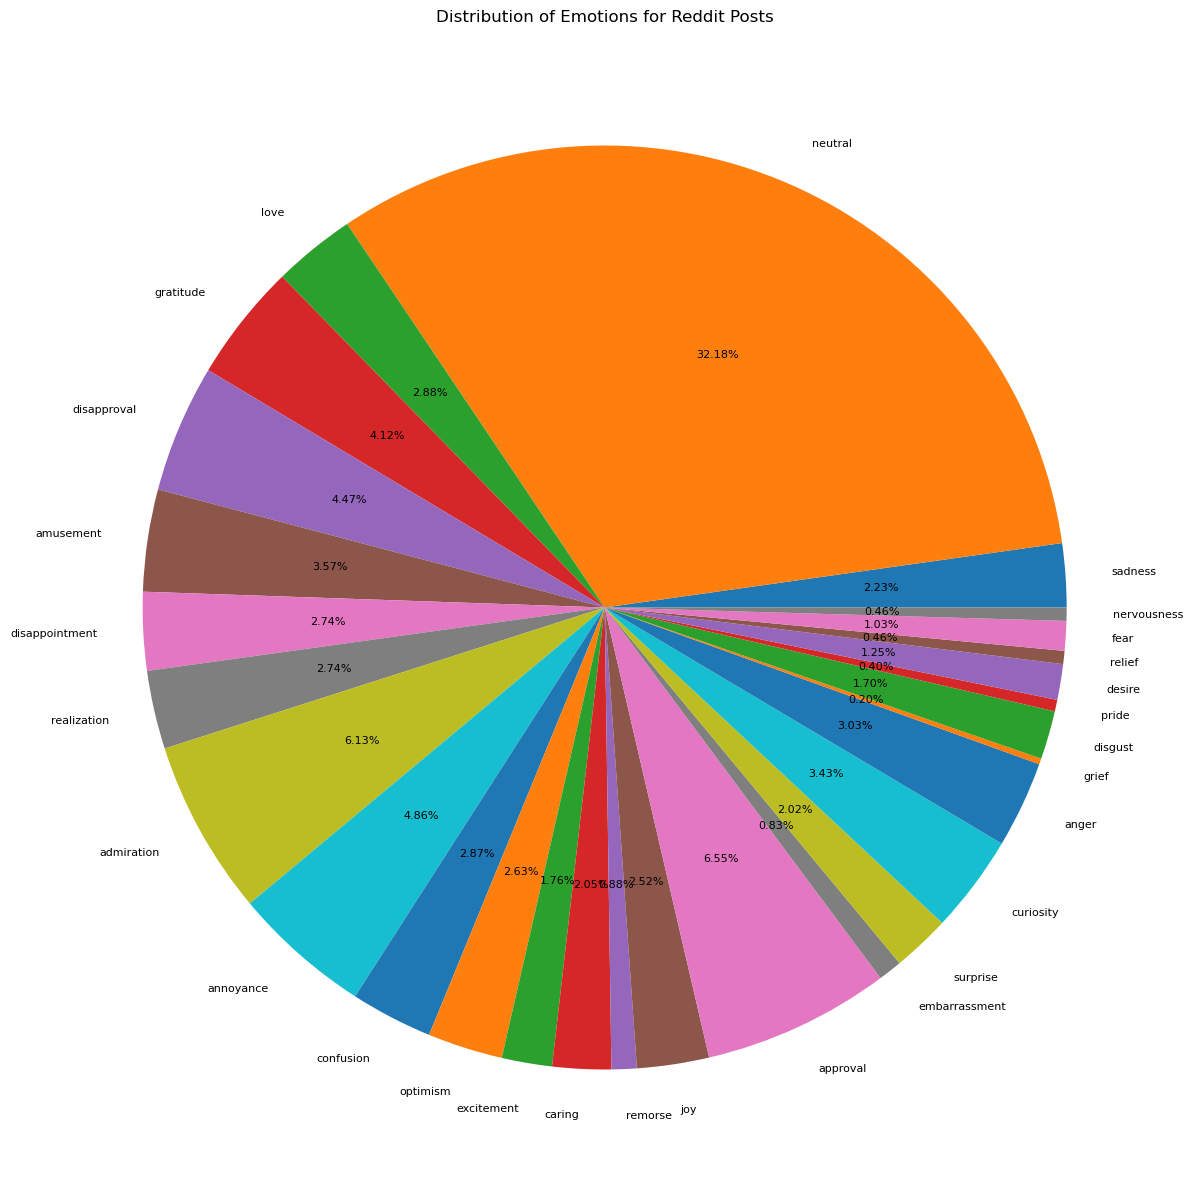

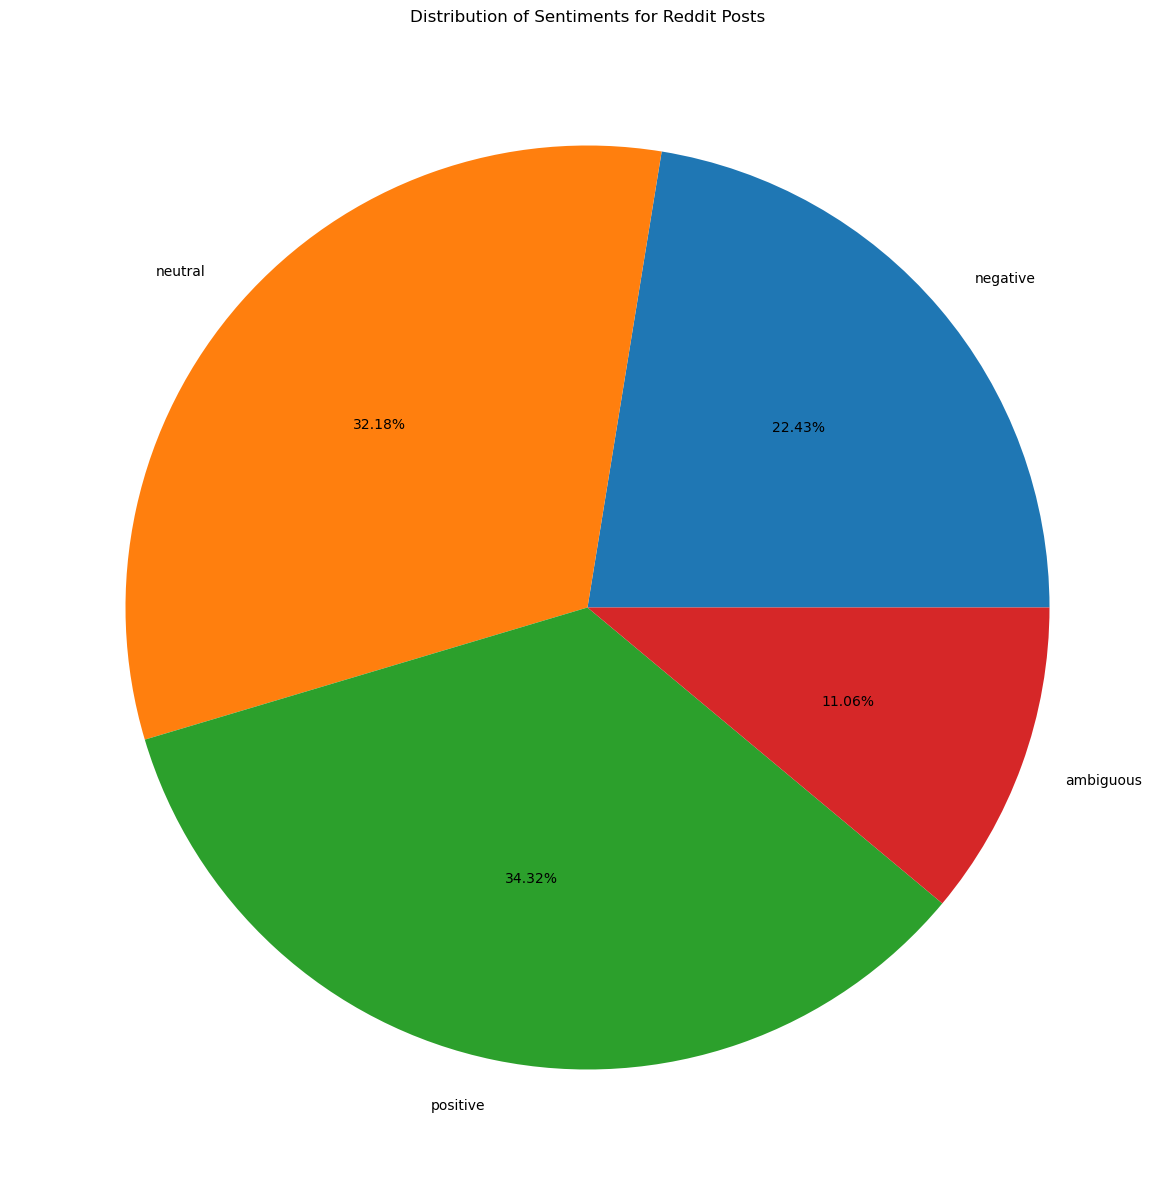

In [43]:
#1.3 Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
posts = []
emotions = []
sentiments = []
# Setting up lost of posts, emotions and sentiments
for instance in dataset:
    post = instance[0]
    emotion = instance[1]
    sentiment = instance[2]
    
    posts.append(post)
    emotions.append(emotion)
    sentiments.append(sentiment)

#1.4 Plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import collections

#Sets up lists of key value pairs for labels and frequency
counter_emotions = collections.Counter(emotions)
counter_sentiments = collections.Counter(sentiments)


#Plot distribution of emotions
plt.figure(figsize=(15,15))
plt.pie(counter_emotions.values(), labels=counter_emotions.keys(),autopct='%.2f%%',textprops={'fontsize': 8}) #Autopct is used to display the percentage in the wedges
plt.title("Distribution of Emotions for Reddit Posts")
plt.savefig("Emotions_Distribution.pdf")
plt.show()

#Plot distribution of emotions
plt.pie(counter_sentiments.values(), labels=counter_sentiments.keys(),autopct='%.2f%%')
plt.title("Distribution of Sentiments for Reddit Posts")
plt.savefig("Sentiments_Distribution.pdf")
plt.show()




    